In [1]:
import re

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords

%matplotlib inline

In [2]:
# Download neccesary corpus
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Exploratory Data Analysis:

In [3]:
# Read CSV
df = pd.read_csv("../artifacts/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Shapes, types and non null count:

In [4]:
print(f"Dataframe shape:\n {df.shape}")
print("\n==================================")
print("\nDataframe info:")
df.info()

Dataframe shape:
 (8807, 12)


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Unique values per column:

In [5]:
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values in Each Column:
show_id: 8807 unique values
type: 2 unique values
title: 8807 unique values
director: 4528 unique values
cast: 7692 unique values
country: 748 unique values
date_added: 1767 unique values
release_year: 74 unique values
rating: 17 unique values
duration: 220 unique values
listed_in: 514 unique values
description: 8775 unique values


### Missing values:

In [6]:
missing_value = df.isnull().sum()
missing_percentage = (missing_value / len(df)) * 100

missing_df = pd.DataFrame({"Missing Value": missing_value, "Percentage": missing_percentage.round(2).astype(str) + "%"})

print("\nMissing Value Analysis:")
print(missing_df[missing_df["Missing Value"] > 0].sort_values("Missing Value", ascending=False))

print("\n=============================================")
print("\nContent Type Distribution:")
print(df["type"].value_counts())


Missing Value Analysis:
            Missing Value Percentage
director             2634     29.91%
country               831      9.44%
cast                  825      9.37%
date_added             10      0.11%
rating                  4      0.05%
duration                3      0.03%


Content Type Distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


### Release Year:

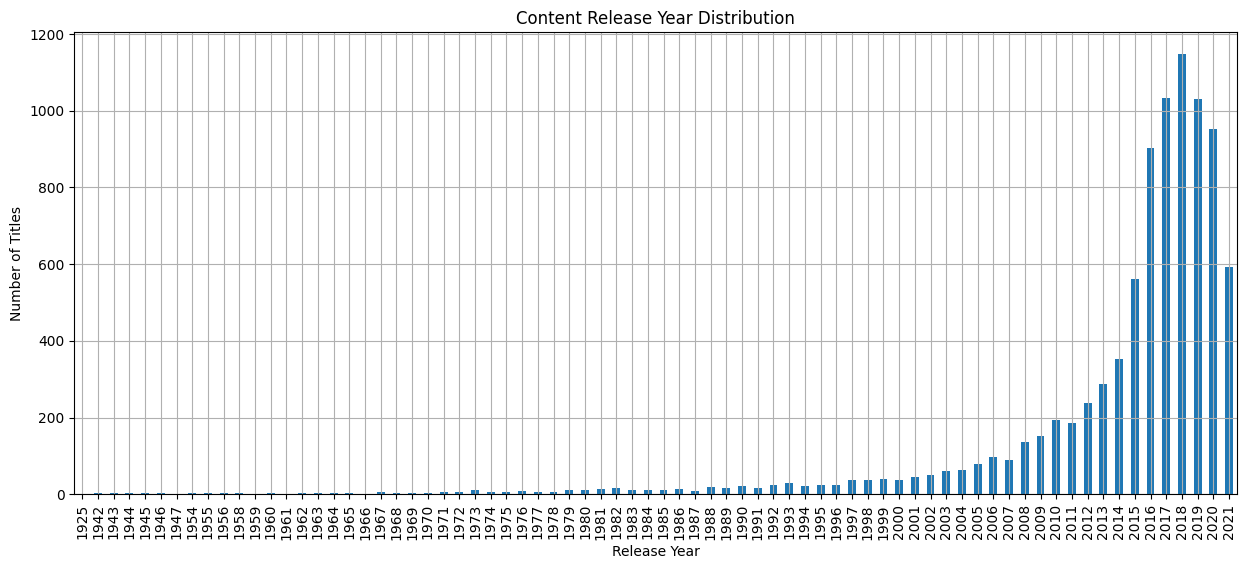

In [7]:
plt.figure(figsize=(15, 6))
df["release_year"].value_counts().sort_index().plot(kind="bar")
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

### Rating distribution:

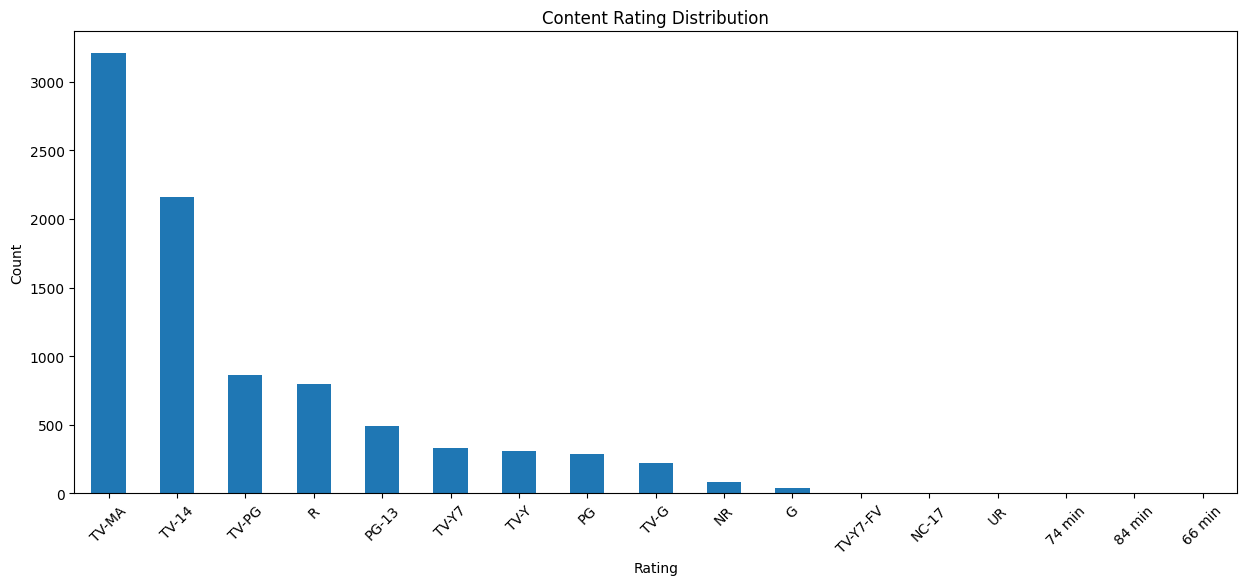

In [8]:
plt.figure(figsize=(15, 6))
df["rating"].value_counts().plot(kind="bar")
plt.title("Content Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Categories distribution:

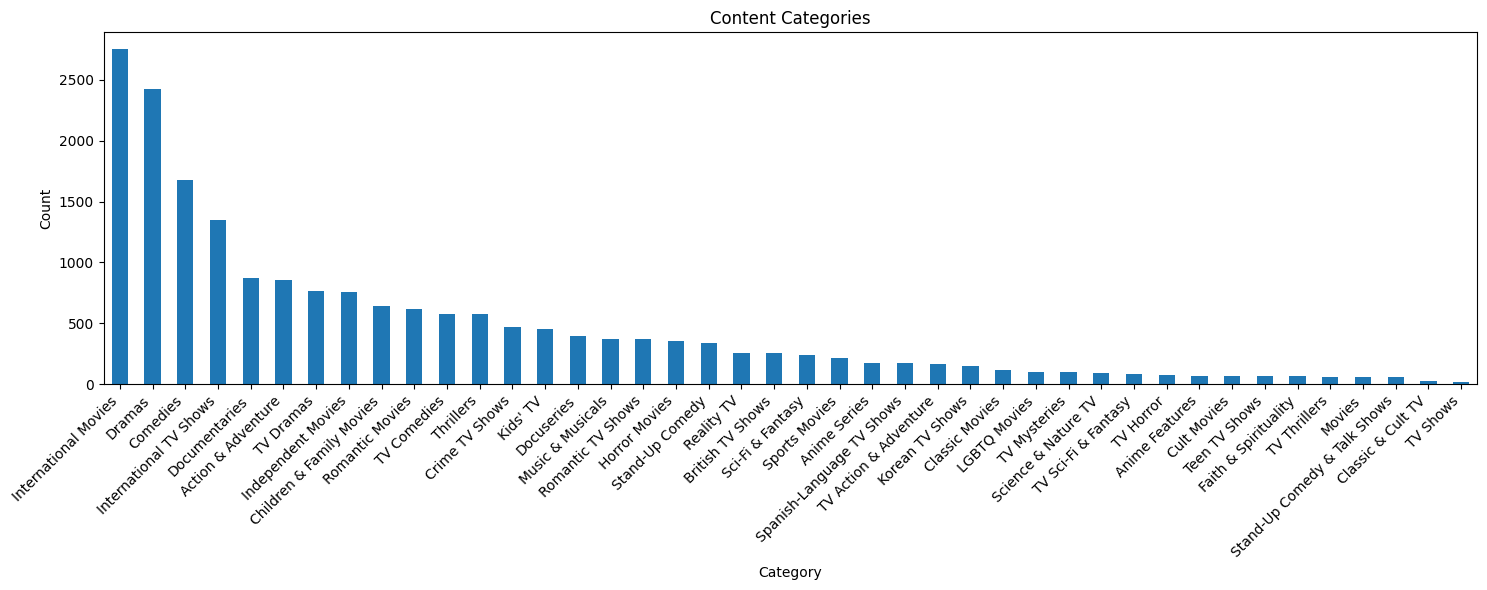

                        category  count  percentage
0           International Movies   2752   31.247871
1                         Dramas   2427   27.557625
2                       Comedies   1674   19.007608
3         International TV Shows   1351   15.340070
4                  Documentaries    869    9.867151
5             Action & Adventure    859    9.753605
6                      TV Dramas    763    8.663563
7             Independent Movies    756    8.584081
8       Children & Family Movies    641    7.278301
9                Romantic Movies    616    6.994436
10                   TV Comedies    581    6.597025
11                     Thrillers    577    6.551607
12                Crime TV Shows    470    5.336664
13                      Kids' TV    451    5.120927
14                    Docuseries    395    4.485069
15              Music & Musicals    375    4.257977
16             Romantic TV Shows    370    4.201204
17                 Horror Movies    357    4.053594
18          

In [9]:
categories = df["listed_in"].str.split(", ").explode()
top_categories = categories.value_counts()

plt.figure(figsize=(15, 6))
top_categories.plot(kind="bar")
plt.title("Content Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_categories_df = pd.DataFrame(
    {
        "category": top_categories.index,
        "count": top_categories.values,
        "percentage": top_categories.values / len(df) * 100,
    }
).sort_values("count", ascending=False, ignore_index=True)
print(top_categories_df)

### Duration distribution:

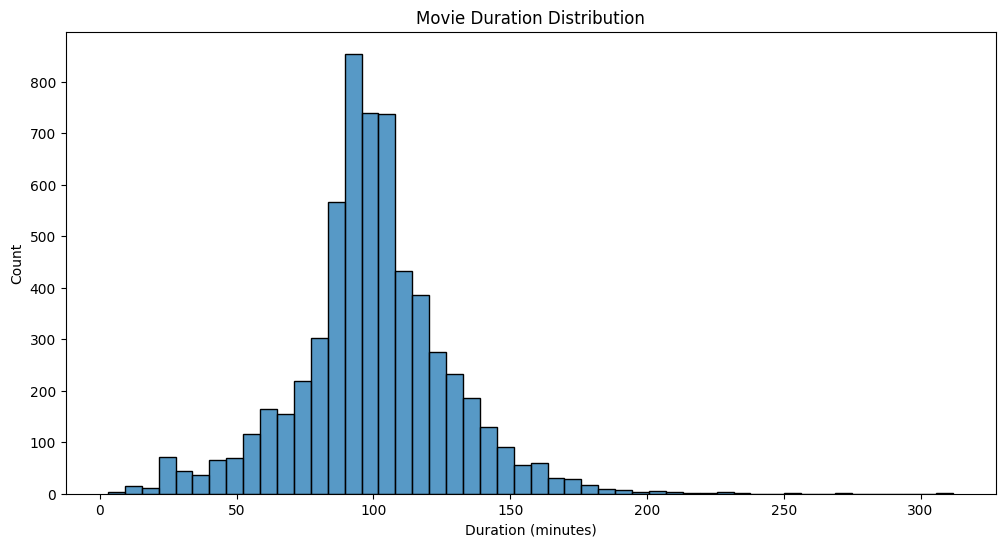

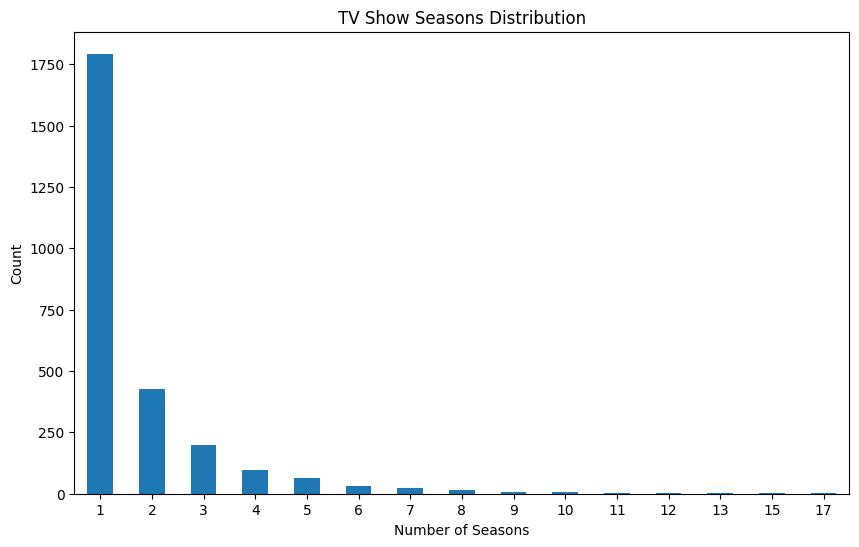

In [10]:
# Separate movies and TV shows
movies = df[df["type"] == "Movie"].copy()
tv_shows = df[df["type"] == "TV Show"].copy()

# Convert movie duration to numeric (remove 'min' and convert to int)
movies["duration_num"] = movies["duration"].str.extract(r"(\d+)").astype(float)

# Plot movie duration distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x="duration_num", bins=50)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

# Analyze TV show seasons
# Extract numbers from strings like "2 Seasons" using regex
tv_seasons = tv_shows["duration"].str.extract(r"(\d+)").astype(int).squeeze()
season_distribution = tv_seasons.value_counts().sort_index()

# Plot TV show seasons distribution
plt.figure(figsize=(10, 6))
season_distribution.plot(kind="bar")
plt.title("TV Show Seasons Distribution")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Feature selection:

In [11]:
df.select_dtypes(include="object").columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Feature preprocessing:

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

# Columns selected
feature_columns = ["description", "director", "cast"]

# Fill null values
df = df.fillna({column: "" for column in feature_columns})

# Combine all text in one column
stop_words = stopwords.words("english")
df["combined_features"] = df[feature_columns].agg(" ".join, axis=1)


def clean_text(text: str) -> str:
    text = re.sub(r"[^a-zA-Z\s]", "", text.lower())  # remove special characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # remove stop words
    clean_text = " ".join(words)

    return clean_text


# Clean text from features
df["clean_combined_features"] = df["combined_features"].apply(clean_text)

# Create target column
df["categories"] = df["listed_in"].str.split(", ")

# Create genre-based groupings
genre_groups = {
    "international": [
        "International Movies",
        "International TV Shows",
        "British TV Shows",
        "Spanish-Language TV Shows",
        "Korean TV Shows",
    ],
    "drama": [
        "TV Dramas",
        "Dramas",
    ],
    "comedy": [
        "TV Comedies",
        "Comedies",
        "Stand-Up Comedy",
        "Stand-Up Comedy & Talk Shows",
    ],
    "action_adventure": [
        "Action & Adventure",
        "TV Action & Adventure",
    ],
    "documentary": [
        "Documentaries",
        "Docuseries",
        "Science & Nature TV",
    ],
    "family_children": [
        "Children & Family Movies",
        "Kids' TV",
    ],
    "romance": [
        "Romantic Movies",
        "Romantic TV Shows",
    ],
    "speculative": [
        "Horror Movies",
        "TV Horror",
        "Sci-Fi & Fantasy",
        "TV Sci-Fi & Fantasy",
    ],
    "thriller_crime": [
        "Thrillers",
        "TV Thrillers",
        "Crime TV Shows",
    ],
    "anime": [
        "Anime Series",
        "Anime Features",
    ],
    "independent": ["Independent Movies"],
    "reality": ["Reality TV"],
    "classic": [
        "Classic Movies",
        "Classic & Cult TV",
        "Cult Movies",
    ],
    "special_interest": [
        "LGBTQ Movies",
        "Faith & Spirituality",
        "Sports Movies",
        "Music & Musicals",
    ],
    "other": [
        "Movies",
        "TV Shows",
        "Teen TV Shows",
        "TV Mysteries",
    ],
}


# Function to map original categories to genre groups
def map_to_genre_groups(categories, genre_group) -> list:
    grouped_cats = []
    for cat in categories:
        mapped = False
        for group, members in genre_groups.items():
            if cat in members:
                grouped_cats.append(group)
                mapped = True
                break
        if not mapped:
            grouped_cats.append("other")  # Fallback for any unmapped categories
    return list(set(grouped_cats))  # Remove duplicates


# Apply mapping
df["genre_grouped_categories"] = df["categories"].apply(lambda x: map_to_genre_groups(x, genre_groups))

# Split data in train and test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=7)

# Create a TF_IDF matrix for train and test data
tfidf = TfidfVectorizer(stop_words="english")
X_train = tfidf.fit_transform(df_train["clean_combined_features"])
X_test = tfidf.transform(df_test["clean_combined_features"])

# Apply a multi label binarizer
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train["genre_grouped_categories"])
y_test = mlb.transform(df_test["genre_grouped_categories"])

In [13]:
# Check the new distribution
def check_grouped_distribution(y, mlb) -> None:
    label_counts = y.sum(axis=0)
    label_names = mlb.classes_

    label_df = pd.DataFrame(
        {"label": label_names, "count": label_counts, "percentage": label_counts / len(y) * 100}
    ).sort_values("count", ascending=False, ignore_index=True)

    print(label_df)


check_grouped_distribution(y_train, mlb)


               label  count  percentage
0      international   3429   48.672818
1              drama   2556   36.281050
2             comedy   2086   29.609652
3        documentary   1019   14.464159
4    family_children    877   12.448545
5     thriller_crime    868   12.320795
6   action_adventure    819   11.625266
7            romance    790   11.213627
8        independent    597    8.474095
9   special_interest    595    8.445706
10       speculative    577    8.190206
11           reality    203    2.881476
12             other    201    2.853087
13             anime    194    2.753726
14           classic    166    2.356281


In [14]:
# Create co-occurrence matrix
co_occurrence = y_train.T @ y_train
np.fill_diagonal(co_occurrence, 0)  # Ignore self-occurrences

# Convert to dataframe for easier analysis
co_df = pd.DataFrame(co_occurrence, index=mlb.classes_, columns=mlb.classes_)

# Find strongest co-occurrences
top_co = []
for label in mlb.classes_:
    top_pairs = co_df[label].sort_values(ascending=False).head(3)
    for paired_label, count in top_pairs.items():
        top_co.append((label, paired_label, count))

top_co.sort(key=lambda x: x[2], reverse=True)
print("Top label co-occurrences:")
for pair in top_co[:30:2]:  # Show top 15
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")


Top label co-occurrences:
drama - international: 1625
comedy - international: 858
international - romance: 562
thriller_crime - international: 501
drama - comedy: 480
independent - drama: 460
action_adventure - international: 374
romance - drama: 354
family_children - comedy: 314
special_interest - international: 245
documentary - special_interest: 231
action_adventure - drama: 226
speculative - international: 185
independent - comedy: 163
speculative - thriller_crime: 138


In [15]:
def validate_split_distribution(y_train, y_test, mlb):
    # Check label distribution before and after split
    train_label_dist = y_train.sum(axis=0) / len(y_train)
    test_label_dist = y_test.sum(axis=0) / len(y_test)

    print("Label Distribution Comparison:")
    for i, label in enumerate(mlb.classes_):
        print(f"{label}:")
        print(f"  Train: {train_label_dist[i]:.4f}")
        print(f"  Test:  {test_label_dist[i]:.4f}")
        print(f"  Difference: {abs(train_label_dist[i] - test_label_dist[i]):.4f}")
        print(
            f"  Relative Difference: {abs((train_label_dist[i] - test_label_dist[i]) / test_label_dist[i]) * 100:.4f}"
        )


validate_split_distribution(y_train, y_test, mlb)

Label Distribution Comparison:
action_adventure:
  Train: 0.1163
  Test:  0.1180
  Difference: 0.0018
  Relative Difference: 1.5206
anime:
  Train: 0.0275
  Test:  0.0301
  Difference: 0.0025
  Relative Difference: 8.4516
classic:
  Train: 0.0236
  Test:  0.0204
  Difference: 0.0031
  Relative Difference: 15.3269
comedy:
  Train: 0.2961
  Test:  0.3031
  Difference: 0.0070
  Relative Difference: 2.2992
documentary:
  Train: 0.1446
  Test:  0.1413
  Difference: 0.0033
  Relative Difference: 2.3528
drama:
  Train: 0.3628
  Test:  0.3598
  Difference: 0.0030
  Relative Difference: 0.8316
family_children:
  Train: 0.1245
  Test:  0.1220
  Difference: 0.0025
  Relative Difference: 2.0202
independent:
  Train: 0.0847
  Test:  0.0902
  Difference: 0.0055
  Relative Difference: 6.0921
international:
  Train: 0.4867
  Test:  0.4767
  Difference: 0.0100
  Relative Difference: 2.0970
other:
  Train: 0.0285
  Test:  0.0216
  Difference: 0.0070
  Relative Difference: 32.2932
reality:
  Train: 0.028

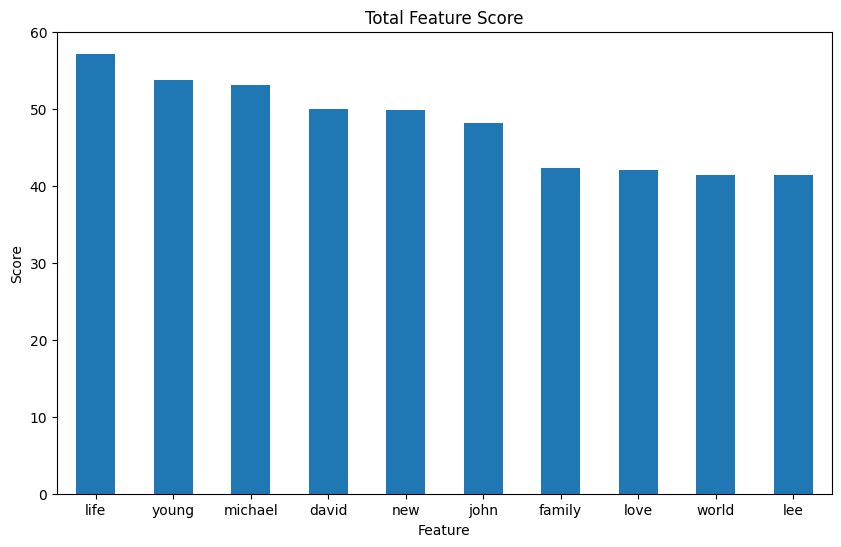

In [16]:
# Get feature names and their TF-IDF scores
feature_names = tfidf.get_feature_names_out()
tfidf_scores = X_train.toarray().sum(axis=0)

# Get top features by score
term_series = pd.Series(tfidf_scores, index=feature_names)
top_terms = term_series.sort_values(ascending=False).head(10)

# Plot TV show seasons distribution
plt.figure(figsize=(10, 6))
top_terms.plot(kind="bar")
plt.title("Total Feature Score")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


### Model Selection:

In [ ]:
import time

from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from xgboost import XGBClassifier

models = {
    "XGBoost": MultiOutputClassifier(XGBClassifier()),
    "CatBoost": MultiOutputClassifier(CatBoostClassifier(verbose=0)),
    "Multi Layer Perceptron": MultiOutputClassifier(MLPClassifier()),
    "Random Forest": MultiOutputClassifier(RandomForestClassifier()),
    "Extra Trees": MultiOutputClassifier(ExtraTreesClassifier()),
    "Decision Tree": MultiOutputClassifier(DecisionTreeClassifier()),
    "Extra Tree": MultiOutputClassifier(ExtraTreeClassifier()),
    "K Neighbors": MultiOutputClassifier(KNeighborsClassifier()),
    "Logistic Regression": MultiOutputClassifier(LogisticRegression()),
}

for model_name, model in models.items():
    # Start timer
    start_time = time.time()

    # Train model
    model.fit(X_train, y_train)

    # End timer
    end_time = time.time()

    # Compute training time
    training_time = end_time - start_time

    # Evaluation
    y_pred = model.predict(X_test)

    print("Model:", model_name)
    print("Training Time: {:.2f} seconds".format(training_time))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred, average='samples')}\n")

Model: K Neighbors
Training Time: 0.01 seconds
Hamming Loss: 0.09704880817253121
Jaccard Score: 0.45234581914491107

Model: Logistic Regression
Training Time: 0.73 seconds
Hamming Loss: 0.10355656451002648
Jaccard Score: 0.3172058267120696



### Hyperparameter Tuning:

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Create custom scorers for multilabel evaluation
jaccard_scorer = make_scorer(jaccard_score, average="samples")
hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

# Define parameter grid for KNN
param_grid = {
    "estimator__n_neighbors": [3, 5, 7, 9, 15, 21],
    "estimator__weights": ["uniform", "distance"],
    "estimator__metric": ["euclidean", "manhattan"],
    "estimator__leaf_size": [20, 30, 40],
}

# Setup MultiOutputClassifier with the base model
knn_multi = MultiOutputClassifier(KNeighborsClassifier())

# Setup grid search with cross-validation
grid_search = GridSearchCV(
    knn_multi,
    param_grid,
    cv=5,
    scoring={"jaccard": jaccard_scorer, "hamming": hamming_scorer},
    refit="jaccard",  # Optimize for Jaccard score
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best Jaccard score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Hamming Loss:", hamming_loss(y_test, y_pred))
print(f"Test Jaccard Score: {jaccard_score(y_test, y_pred, average='samples')}\n")


Best parameters: {'estimator__leaf_size': 20, 'estimator__metric': 'euclidean', 'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Best Jaccard score: 0.4622214336408801


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions for XGBoost
param_distributions = {
    "estimator__n_estimators": [50, 100, 200, 300],
    "estimator__max_depth": [3, 5, 7, 9],
    "estimator__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "estimator__subsample": [0.7, 0.8, 0.9, 1.0],
    "estimator__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "estimator__min_child_weight": [1, 3, 5],
    "estimator__gamma": [0, 0.1, 0.2],
}

# Setup MultiOutputClassifier with the base model
xgb_multi = MultiOutputClassifier(XGBClassifier(eval_metric="mlogloss"))

# Setup randomized search with cross-validation
random_search = RandomizedSearchCV(
    xgb_multi,
    param_distributions,
    n_iter=30,  # Try 30 random combinations
    cv=5,
    scoring={"jaccard": jaccard_scorer, "hamming": hamming_scorer},
    refit="jaccard",  # Optimize for Jaccard score
    n_jobs=-1,  # Use all available cores
    random_state=42,  # For reproducibility
    verbose=1,  # Show progress
)

# Fit randomized search
random_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best Jaccard score:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Jaccard score:", jaccard_score(y_test, y_pred, average="samples"))
print("Test Hamming loss:", hamming_loss(y_test, y_pred))


Fitting 5 folds for each of 30 candidates, totalling 150 fits


Best parameters: {'estimator__subsample': 1.0, 'estimator__n_estimators': 300, 'estimator__min_child_weight': 3, 'estimator__max_depth': 7, 'estimator__learning_rate': 0.2, 'estimator__gamma': 0, 'estimator__colsample_bytree': 0.9}
Best Jaccard score: 0.42248639697184764
Test Jaccard score: 0.41736662883087394
Test Hamming loss: 0.10416193719258418


In [17]:
from sklearn.metrics import hamming_loss, jaccard_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier

# Set up a faster multi layer perceptron
faster_mlp = MultiOutputClassifier(
    MLPClassifier(
        hidden_layer_sizes=(64,),  # Smaller hidden layer
        activation="relu",
        solver="adam",
        alpha=0.0001,  # L2 regularization
        batch_size=256,  # Larger batch size for faster processing
        learning_rate="adaptive",
        learning_rate_init=0.01,  # Higher initial learning rate
        max_iter=100,  # Fewer maximum iterations
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.1,  # 10% of training data for validation
        tol=1e-3,  # Less strict convergence tolerance
        n_iter_no_change=10,  # Stop if no improvement for 10 consecutive iterations
        verbose=False,
    )
)

# Fit faster mlp model
faster_mlp.fit(X_train, y_train)

# Evaluate on test set
y_pred = faster_mlp.predict(X_test)
print("Test Jaccard score:", jaccard_score(y_test, y_pred, average="samples"))
print("Test Hamming loss:", hamming_loss(y_test, y_pred))

Test Jaccard score: 0.5257094211123723
Test Hamming loss: 0.08448732500945895


In [ ]:
# Define different configurations to test
configs = [
    # Baseline
    {
        "name": "Baseline",
        "hidden_layer_sizes": (64,),
        "learning_rate_init": 0.01,
        "batch_size": 256,
    },
    # Slightly deeper network
    {
        "name": "Two layers",
        "hidden_layer_sizes": (64, 32),
        "learning_rate_init": 0.01,
        "batch_size": 256,
    },
    # Wider network
    {
        "name": "Wider network",
        "hidden_layer_sizes": (128,),
        "learning_rate_init": 0.01,
        "batch_size": 256,
    },
    # Different activation function
    {
        "name": "Tanh activation",
        "hidden_layer_sizes": (64,),
        "learning_rate_init": 0.01,
        "batch_size": 256,
        "activation": "tanh",
    },
    # Different solver
    {
        "name": "SGD solver",
        "hidden_layer_sizes": (64,),
        "learning_rate_init": 0.01,
        "batch_size": 256,
        "solver": "sgd",
        "momentum": 0.9,
    },
]

# Test each configuration
results = []
for config in configs:
    name = config.pop("name")

    # Create and configure the MLP classifier with default parameters
    mlp_params = {
        "activation": "relu",
        "solver": "adam",
        "alpha": 0.0001,
        "early_stopping": True,
        "validation_fraction": 0.1,
        "max_iter": 100,
        "tol": 1e-3,
        "n_iter_no_change": 10,
        "verbose": False,
    }

    # Update with configuration-specific parameters
    mlp_params.update(config)

    # Create and train the model
    mlp = MultiOutputClassifier(MLPClassifier(**mlp_params))

    start_time = time.time()
    mlp.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate on test set
    y_pred = mlp.predict(X_test)
    j_score = jaccard_score(y_test, y_pred, average="samples")
    h_loss = hamming_loss(y_test, y_pred)

    results.append({"name": name, "time": training_time, "jaccard": j_score, "hamming": h_loss})

    print(f"{name}:")
    print(f"  Training time: {training_time:.2f} seconds")
    print(f"  Jaccard score: {j_score:.4f}")
    print(f"  Hamming loss:  {h_loss:.4f}")
    print("-" * 40)

# Print results summary
print("\nResults Summary (sorted by Jaccard score):")
for result in sorted(results, key=lambda x: x["jaccard"], reverse=True):
    print(
        f"{result['name']}: Jaccard={result['jaccard']:.4f}, Hamming={result['hamming']:.4f}, Time={result['time']:.2f}s"
    )


Baseline:
  Training time: 295.16 seconds
  Jaccard score: 0.5080
  Hamming loss:  0.0871
----------------------------------------
Two layers:
  Training time: 299.49 seconds
  Jaccard score: 0.5066
  Hamming loss:  0.0880
----------------------------------------
Wider network:
  Training time: 471.32 seconds
  Jaccard score: 0.4877
  Hamming loss:  0.0879
----------------------------------------
Tanh activation:
  Training time: 234.10 seconds
  Jaccard score: 0.5053
  Hamming loss:  0.0862
----------------------------------------
SGD solver:
  Training time: 126.51 seconds
  Jaccard score: 0.0003
  Hamming loss:  0.1415
----------------------------------------

Results Summary (sorted by Jaccard score):
Baseline: Jaccard=0.5080, Hamming=0.0871, Time=295.16s
Two layers: Jaccard=0.5066, Hamming=0.0880, Time=299.49s
Tanh activation: Jaccard=0.5053, Hamming=0.0862, Time=234.10s
Wider network: Jaccard=0.4877, Hamming=0.0879, Time=471.32s
SGD solver: Jaccard=0.0003, Hamming=0.1415, Time=12

### Prediction Example:

In [27]:
# Get index from sample
df_pred = df_test.reset_index(drop=True).copy()

# Predict categories
y_pred = faster_mlp.predict(X_test)

# Get real and predicted categories
categories = mlb.inverse_transform(y_pred)
df_pred["predicted_categories"] = pd.Series(categories).apply(lambda x: ", ".join(x))

row = 3
print(df_pred.loc[row, "director"])
print(df_pred.loc[row, "cast"])
print(df_pred.loc[row, "description"])
df_pred[["title", "director", "cast", "description", "genre_grouped_categories", "predicted_categories"]].head(20)

Jay Chandrasekhar
Johnny Knoxville, Seann William Scott, Jessica Simpson, Burt Reynolds, M.C. Gainey, David Koechner, Kevin Heffernan, James Roday, Michael Roof, Joe Don Baker
The Duke boys are back in this comedy based on the TV series, following Bo and Luke as they tear around Hazzard County in their trusty Dodge Charger.


,title,director,cast,description,genre_grouped_categories,predicted_categories
0,The Kingdom,,"Chino Darín, Nancy Dupláa, Joaquín Furriel, Pe...","After his running mate's murder, a controversi...","[international, thriller_crime]","drama, international"
1,Tersanjung the Movie,"Hanung Bramantyo, Pandu Adjisurya","Clara Bernadeth, Giorgino Abraham, Kevin Ardil...","After growing up in a tumultuous household, Yu...","[international, romance, drama]","drama, international"
2,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,An Argentine comedian espouses the values of f...,[comedy],comedy
3,The Dukes of Hazzard,Jay Chandrasekhar,"Johnny Knoxville, Seann William Scott, Jessica...",The Duke boys are back in this comedy based on...,"[comedy, action_adventure]",comedy
4,Ugly Duckling,,"Mook Worranit Thawornwong, Puttichai Kasetsin,...",Young women face up to their insecurities and ...,"[international, romance, drama]","drama, international, romance"
5,Good Time,"Benny Safdie, Josh Safdie","Robert Pattinson, Benny Safdie, Jennifer Jason...","After spearheading an ill-fated bank robbery, ...","[drama, independent, thriller_crime]","drama, thriller_crime"
6,The Great British Baking Show: Masterclass,,"Mary Berry, Paul Hollywood",Hosts Mary Berry and Paul Hollywood leave the ...,"[international, reality]",reality
7,Chelsea Handler: Uganda Be Kidding Me Live,James Yukich,Chelsea Handler,"In her first Netflix stand-up comedy special, ...",[comedy],comedy
8,The Assassination of Gianni Versace,,"Edgar Ramírez, Darren Criss, Ricky Martin, Pen...","Defining moments in Andrew Cunanan's life, sta...","[drama, thriller_crime]",international
9,Men in Black,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Linda Fiorentino,...",A streetwise cop teams with a veteran governme...,"[speculative, comedy, action_adventure]",action_adventure


### Recommendations:

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

df_rec = df_train.reset_index(drop=True).copy()

# Select title
title = "Yes or No"
idx = df_rec[df_rec["title"] == title].index[0]

# Create similarity score
similarity_matrix = cosine_similarity(X_train)
similarity_scores = sorted(list(enumerate(similarity_matrix[idx])), key=lambda x: x[1], reverse=True)

# Get top n similar titles (excluding the input title)
similar_titles = similarity_scores[1:6]

# Append to recommendation
recommendations = []
for i, score in similar_titles:
    recommendations.append(
        {
            "title": df_rec.iloc[i]["title"],
            "type": df_rec.iloc[i]["type"],
            "description": df_rec.iloc[i]["description"],
            # 'clean_combined_features': df.loc[i, 'clean_combined_features'],
            "similarity_score": score,
            "genre": df_rec.iloc[i]["listed_in"],
        }
    )

recommendations

[{'title': 'Yes or No 2.5',
  'type': 'Movie',
  'description': 'Roommates Wine and Pie find their lives turned upside down when two more ladies move in next door, bringing up past heartaches and new attractions.',
  'similarity_score': 0.14742217120611273,
  'genre': 'International Movies, LGBTQ Movies, Romantic Movies'},
 {'title': 'The Unborn Child',
  'type': 'Movie',
  'description': 'A couple and their young daughter are haunted by a paranormal, malicious presence – which is soon linked to a temple and a series of abortions.',
  'similarity_score': 0.09106902030085157,
  'genre': 'Horror Movies, International Movies'},
 {'title': 'The Good Catholic',
  'type': 'Movie',
  'description': 'A young priest’s faith is tested when he finds himself attracted to a woman he meets at confession and his ideals are shaken to the core.',
  'similarity_score': 0.06647879866006423,
  'genre': 'Comedies, Dramas, Romantic Movies'},
 {'title': 'Nang Nak',
  'type': 'Movie',
  'description': 'In thi